<a href="https://colab.research.google.com/github/kulkarnisunil/Class_Assingments/blob/main/EDA__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

Answer :                                                  



In [43]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",10)

import warnings
warnings.filterwarnings("ignore")

In [44]:
data=pd.read_csv("/content/BIKE DETAILS.csv")

In [45]:
data.head(n=10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


## 2.  Check for missing values in all columns and describe your approach for handling them.

Answer :    

In [46]:
data.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


1.  If few missing value (<1%), either drop the rows, fill them using statistical measures like mean, median[Numerical data], or mode[Categorical data] — depending on the type of data.

* drop missing value using data.dropna()
* fill missing value using data[clm_name].fillna(data[clm_name].mean(),inplace=True)

2. For columns with large portions of missing data (<30%),drop the column if column is not important,use advanced imputation methods like

* Regression imputation
* KNN imputation
* IterativeImputer from sklearn



## 3. Plot the distribution of selling prices using a histogram and describe the overall trend.

Answer :  

In [47]:
import plotly.express as px

In [48]:
fig = px.histogram(data, x='selling_price', nbins=50, title='Distribution of Selling Prices')
fig.update_layout(xaxis_title='Selling Price', yaxis_title='Frequency')
fig.show()

Description :                         

1. the distribution of selling prices is right skew means large number of bikes are sold at lower price,while few bikes sold at higer price.
2. There is a long tail to the right,its indication of the presence of outliers.These outliers represent bikes with significantly higher selling prices compared to the bulk of the data.
3. The majority of the selling prices appear to be concentrated in the lower range.
4. here we can use some outlier handling techniques : like
  
  * tarnsformation : like boxcox,lognormal,etc. this make skewed distribution more symmetrical,this is benefical to if models that asumme normally distributed data [regression]
  * Use Iqr or z score method to remove and indetify ouliers

## 4.  Create a bar plot to visualize the average selling price for each seller_type and write one observation.

Answer :

In [49]:
# Calculate the average selling price for each seller_type

Average_selling_price_by_seller_type=data.groupby("seller_type")["selling_price"].mean().reset_index()
Average_selling_price_by_seller_type

,seller_type,selling_price
0,Dealer,46666.666667
1,Individual,59711.923223


In [50]:
# bar plot
fig=px.bar(Average_selling_price_by_seller_type,x="seller_type",y="selling_price",title="Average Selling Price by Seller Type")
fig.update_layout(xaxis_title="Seller Type",yaxis_title="Average Selling Price")
fig.show()

Obeservation :                   

Based on bar chart,The average selling price for bikes sold by individual sellers is higher than the average selling price for bikes sold by dealer sellers.

## 5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

Answer :

In [51]:
# average km_driven for each ownership type
average_km_driven_by_owner = data.groupby('owner')['km_driven'].mean().reset_index()
print("Average km_driven by ownership type:")
print(average_km_driven_by_owner)

Average km_driven by ownership type:
       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


In [52]:
#bar plot of the average km_driven by ownership type
fig=px.bar(average_km_driven_by_owner,x="owner",y="km_driven",title="Average Kilometers Driven")
fig.update_layout(xaxis_title="Ownership Type",yaxis_title="Average Kilometers Driven")
fig.show()

In [53]:
# Observation :
# 1. The average kilometers driven varies significantly across different ownership types.
# 2. 4th owner vehicles have a substantially higher average kilometers driven compared to 1st,2nd,3rd owner vehicles.
# 3. 1st,2nd,3rd owner vehicles have relatively similar average kilometers driven,thoogh 2nd owner vehicles show a slightly higher than 1st and
#    2nd owner vehicles
# 4. This suggests that vehicles with more previous owners tend to have accumulated more mileage, particularly those with four or more owners.

## 6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Answer :   

In [54]:
print("\nBefore removing outliers:")
data.describe()


Before removing outliers:


,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [55]:
def detect_and_remove_outliers(data, clm_name_str):
  Q1 = data[clm_name_str].quantile(0.25)  # 25%
  Q3 = data[clm_name_str].quantile(0.75)  # 75%
  IQR = Q3 - Q1   # Inner quartile range
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Detect outlier
  Outliers = data[(data[clm_name_str] < lower_bound) | (data[clm_name_str] > upper_bound)]
  print(f"Number of outliers present in {clm_name_str}: {Outliers.shape[0]}")

  # Remove Outliers
  new_data = data[(data[clm_name_str] >= lower_bound) & (data[clm_name_str] <= upper_bound)]
  print(f"data shape before: {data.shape} and data shape after: {new_data.shape}")
  return new_data

In [56]:
# apply function on km_driven column
data_no_outliers = detect_and_remove_outliers(data, "km_driven")

Number of outliers present in km_driven: 39
data shape before: (1061, 7) and data shape after: (1022, 7)


In [57]:
# Show summary statistics after removing outliers
print("\nAfter removing outliers:")
display(data_no_outliers.describe())


After removing outliers:


,selling_price,year,km_driven,ex_showroom_price
count,1022.000000,1022.000000,1022.000000,6.070000e+02
mean,60810.166341,2014.014677,28203.415851,8.856537e+04
std,56868.037871,4.242962,19552.083583,7.856007e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,30000.000000,2012.000000,13000.000000,5.500000e+04
50%,45000.000000,2015.000000,24000.000000,7.297300e+04
75%,72000.000000,2017.000000,40000.000000,8.704200e+04
max,760000.000000,2020.000000,86000.000000,1.278000e+06


## 7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

Answer :                                           

In [58]:
fig = px.scatter(data, x='year', y='selling_price',
                 title='Selling Price vs. Year of Manufacture')
fig.update_layout(xaxis_title='Year of Manufacture', yaxis_title='Selling Price')
fig.show()

In [59]:
# - Scatter plot shows a general trend where older bikes (lowe year values) tend to have lower selling price while newer bikers(higher year values) generally have higher selling prices.
# - Indicates a positive correlation between the year of manufacture and the selling price – as the bike gets newer, its selling price tends to increase.
# - there is also a significant spread in selling prices for any given year, suggesting that other factors also influence the price.
# - particularly older bikes with relatively high selling prices, which could be due to factors like being a classic model or being in excellent condition.

## 8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

Answer :

In [60]:
data.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [61]:
# seller type conver numeric format using pd.get_dummies

In [62]:
data_encoded = pd.get_dummies(data, columns=['seller_type'], drop_first=True)

In [63]:
print("DataFrame after one-hot encoding 'seller_type':")
display(data_encoded.head())

DataFrame after one-hot encoding 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


##  9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

Answer :  

In [64]:
numerical_columns = [column for column in data_encoded.columns if data_encoded[column].dtype in ['int64', 'float64']]
numerical_columns

['selling_price', 'year', 'km_driven', 'ex_showroom_price']

In [65]:
# calculate correlation matrix
correlation_matrix = data_encoded[numerical_columns].corr()

In [66]:
correlation_matrix

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


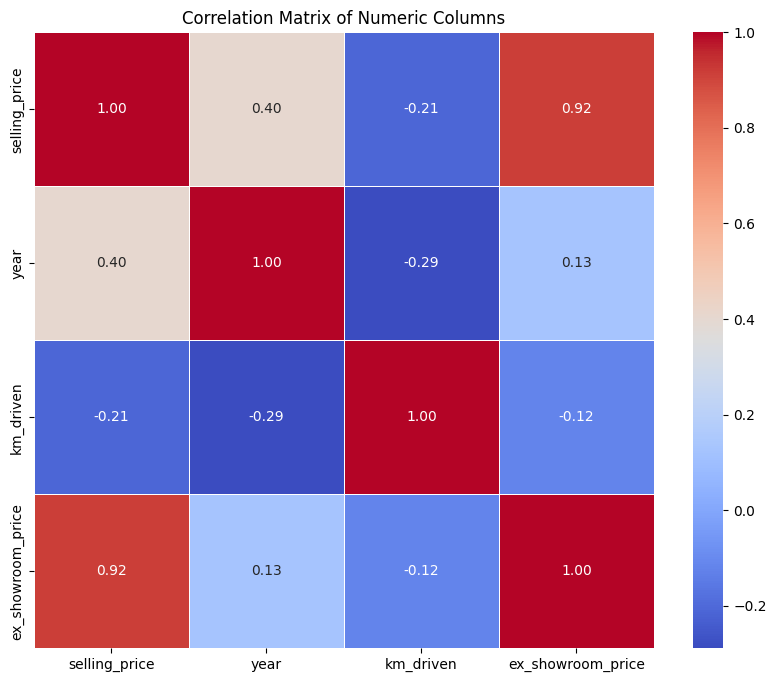

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [68]:
# 1. There is high correlation betwenn Selling Price and Ex-Showroom Price [0.92],here is clearly indicate that the ex-showroom price is a major
# factor in determining the selling price of a bike.
# 2. There is a moderate positive correlation between selling_price and year. This suggests that newer bikes tend to have higher selling prices,
#  which aligns with our observation from the scatter plot.
# 3. There is a weak negative correlation between year and km_driven. This is also expected, as older bikes are likely to have accumulated
# more kilometers over time.
# 4. here is a weak negative correlation between selling_price and km_driven. This suggests that bikes with higher km driven tend to have
#   slightly lower selling prices
# 5. The correlations between ex_showroom_price and year (0.13) and ex_showroom_price and km_driven (-0.12) are quite weak, indicating that these
#    factors have less impact on the ex-showroom price compared to the direct relationship between selling price and ex-showroom price.

### 10. Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.

Answer :

**Summary Report:**

**1. Important Factors Affecting a Bike's Selling Price:**

#### Based on correlation matrix and scatter plot, the most important factors affecting a bike's selling price is:                 

        *  Ex-Showroom Price: There is a very high positive correlation (0.92) between ex-showroom price and selling price. This indicates that the initial price of the bike significantly influences its resale value.
        *  Year of Manufacture: There is a moderate positive correlation (0.40) between the year of manufacture and selling price. Newer bikes tend to have higher selling prices.
        *  Kilometers Driven: There is a weak negative correlation (-0.21) between kilometers driven and selling price. Bikes with higher mileage tend to have slightly lower selling prices.

  
**2. Data Cleaning and Feature Engineering Performed:**

* Handling Missing Values:  I checked for missing values and found 435 missing values in the ex_showroom_price column.
          - numerical clmn fill missing value using mean,median.
          - Categorical clmn fill missing value using mode.
* Outlier Detection and Removal:  I used the IQR method to detect and remove outliers from the 'km_driven' column. This resulted in the removal of 39 outliers, leading to a change in the summary statistics for km_driven.
* Feature Engineering (One-Hot Encoding): I converted the categorical seller_type column into a numeric format using one-hot encoding. This created a new column seller_type_Individual to represent the seller type numerically.